In [2]:
# lets import all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# lets store the dataframe in an variable and explore it

d = pd.read_csv("train_salary.csv")
print(d.head())
print()
print(d.columns)
print()
print(d.info())


                 Name                       JobTitle AgencyID  \
0     Aaron,Keontae E                 AIDE BLUE CHIP   W02200   
1    Aaron,Patricia G  Facilities/Office Services II   A03031   
2       Aaron,Petra L     ASSISTANT STATE'S ATTORNEY   A29005   
3  Abaineh,Yohannes T                 EPIDEMIOLOGIST   A65026   
4    Abbene,Anthony M         POLICE OFFICER TRAINEE   A99416   

                     Agency    HireDate AnnualSalary   GrossPay  
0            Youth Summer    06/10/2013    $11310.00    $873.63  
1       OED-Employment Dev   10/24/1979    $53428.00  $52868.38  
2  States Attorneys Office   09/25/2006    $68300.00  $67439.19  
3   HLTH-Health Department   07/23/2009    $62000.00  $58654.74  
4        Police Department   07/24/2013    $43999.00  $39686.95  

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (t

In [4]:
# lets check the no. of missing values in each column

print(d.isnull().sum())

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64


In [5]:
# lets make a copy to make sure we dont loos the original data

d_c = d.copy()
print(d_c.columns)

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


In [6]:
# as GrossPay and AnnualSalary are same. lets remove 1 column

d_c.drop(["GrossPay"],axis=1,inplace=True)  # "drop" --> drops whole row(axis=0)/columns(axis=1)

In [7]:
print(d_c.head())

                 Name                       JobTitle AgencyID  \
0     Aaron,Keontae E                 AIDE BLUE CHIP   W02200   
1    Aaron,Patricia G  Facilities/Office Services II   A03031   
2       Aaron,Petra L     ASSISTANT STATE'S ATTORNEY   A29005   
3  Abaineh,Yohannes T                 EPIDEMIOLOGIST   A65026   
4    Abbene,Anthony M         POLICE OFFICER TRAINEE   A99416   

                     Agency    HireDate AnnualSalary  
0            Youth Summer    06/10/2013    $11310.00  
1       OED-Employment Dev   10/24/1979    $53428.00  
2  States Attorneys Office   09/25/2006    $68300.00  
3   HLTH-Health Department   07/23/2009    $62000.00  
4        Police Department   07/24/2013    $43999.00  


In [8]:
# As HireDate has also missing values which are only 70. lets drop those.

d_c.dropna(subset=["HireDate"],inplace=True)
print(d_c.isnull().sum())

 Name           0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64


In [9]:
# now lets remove "$" in AnnualSalary column

d_c["AnnualSalary"] = d_c["AnnualSalary"].apply(lambda x : float(str(x)[1:]))  # lambda x : operation with x .
                                                                               # "apply" --> applies to all dataframe(specific or whole)
print(d_c)

                       Name                       JobTitle AgencyID  \
0           Aaron,Keontae E                 AIDE BLUE CHIP   W02200   
1          Aaron,Patricia G  Facilities/Office Services II   A03031   
2             Aaron,Petra L     ASSISTANT STATE'S ATTORNEY   A29005   
3        Abaineh,Yohannes T                 EPIDEMIOLOGIST   A65026   
4          Abbene,Anthony M         POLICE OFFICER TRAINEE   A99416   
...                     ...                            ...      ...   
18976  Zotamou,Jean Marie D                 AIDE BLUE CHIP   W02235   
18977       Zotamou,Pivot D                 AIDE BLUE CHIP   W02629   
18978  Zovistoski,Zachary D         POLICE OFFICER TRAINEE   A99416   
18979     Zubyk,Stanislav T                 POLICE OFFICER   A99262   
18980    Zukowski,Charles J   Waste Water Tech Supv I Pump   A50206   

                         Agency    HireDate  AnnualSalary  
0                Youth Summer    06/10/2013       11310.0  
1           OED-Employment 

In [10]:
# lets create date, month and year from HireDate column

d_c["MONTH"] = pd.DatetimeIndex(d_c["HireDate"]).month  # converts to DatetimeIndex format for the respective column and can use operations like .month.
d_c["YEAR"] = pd.DatetimeIndex(d_c["HireDate"]).year
print(d_c)

                       Name                       JobTitle AgencyID  \
0           Aaron,Keontae E                 AIDE BLUE CHIP   W02200   
1          Aaron,Patricia G  Facilities/Office Services II   A03031   
2             Aaron,Petra L     ASSISTANT STATE'S ATTORNEY   A29005   
3        Abaineh,Yohannes T                 EPIDEMIOLOGIST   A65026   
4          Abbene,Anthony M         POLICE OFFICER TRAINEE   A99416   
...                     ...                            ...      ...   
18976  Zotamou,Jean Marie D                 AIDE BLUE CHIP   W02235   
18977       Zotamou,Pivot D                 AIDE BLUE CHIP   W02629   
18978  Zovistoski,Zachary D         POLICE OFFICER TRAINEE   A99416   
18979     Zubyk,Stanislav T                 POLICE OFFICER   A99262   
18980    Zukowski,Charles J   Waste Water Tech Supv I Pump   A50206   

                         Agency    HireDate  AnnualSalary  MONTH  YEAR  
0                Youth Summer    06/10/2013       11310.0      6  2013  
1

In [11]:
dic = {1:"JANUARY",2:"FEBUARY",3:"MARCH",4:"APRIL",5:"MAY",6:"JUNE",7:"JULY",8:"AUGUST",9:"SEPTEMBER",10:"OCTOBER",11:"NOVEMBER",12:"DECEMBER"}

d_c["MONTH"] = d_c["MONTH"].map(dic)
print(d_c)

                       Name                       JobTitle AgencyID  \
0           Aaron,Keontae E                 AIDE BLUE CHIP   W02200   
1          Aaron,Patricia G  Facilities/Office Services II   A03031   
2             Aaron,Petra L     ASSISTANT STATE'S ATTORNEY   A29005   
3        Abaineh,Yohannes T                 EPIDEMIOLOGIST   A65026   
4          Abbene,Anthony M         POLICE OFFICER TRAINEE   A99416   
...                     ...                            ...      ...   
18976  Zotamou,Jean Marie D                 AIDE BLUE CHIP   W02235   
18977       Zotamou,Pivot D                 AIDE BLUE CHIP   W02629   
18978  Zovistoski,Zachary D         POLICE OFFICER TRAINEE   A99416   
18979     Zubyk,Stanislav T                 POLICE OFFICER   A99262   
18980    Zukowski,Charles J   Waste Water Tech Supv I Pump   A50206   

                         Agency    HireDate  AnnualSalary      MONTH  YEAR  
0                Youth Summer    06/10/2013       11310.0       JUNE  

In [12]:
d_c["DAY"] = pd.DatetimeIndex(d_c["HireDate"]).day
print(d_c)

                       Name                       JobTitle AgencyID  \
0           Aaron,Keontae E                 AIDE BLUE CHIP   W02200   
1          Aaron,Patricia G  Facilities/Office Services II   A03031   
2             Aaron,Petra L     ASSISTANT STATE'S ATTORNEY   A29005   
3        Abaineh,Yohannes T                 EPIDEMIOLOGIST   A65026   
4          Abbene,Anthony M         POLICE OFFICER TRAINEE   A99416   
...                     ...                            ...      ...   
18976  Zotamou,Jean Marie D                 AIDE BLUE CHIP   W02235   
18977       Zotamou,Pivot D                 AIDE BLUE CHIP   W02629   
18978  Zovistoski,Zachary D         POLICE OFFICER TRAINEE   A99416   
18979     Zubyk,Stanislav T                 POLICE OFFICER   A99262   
18980    Zukowski,Charles J   Waste Water Tech Supv I Pump   A50206   

                         Agency    HireDate  AnnualSalary      MONTH  YEAR  \
0                Youth Summer    06/10/2013       11310.0       JUNE 

In [20]:
# lets see which agencies are doing more hiring

d_c["Agency"].value_counts()      # gives count of each unique values in given column/

Agency
Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: count, Length: 65, dtype: int64

<Axes: xlabel='Agency'>

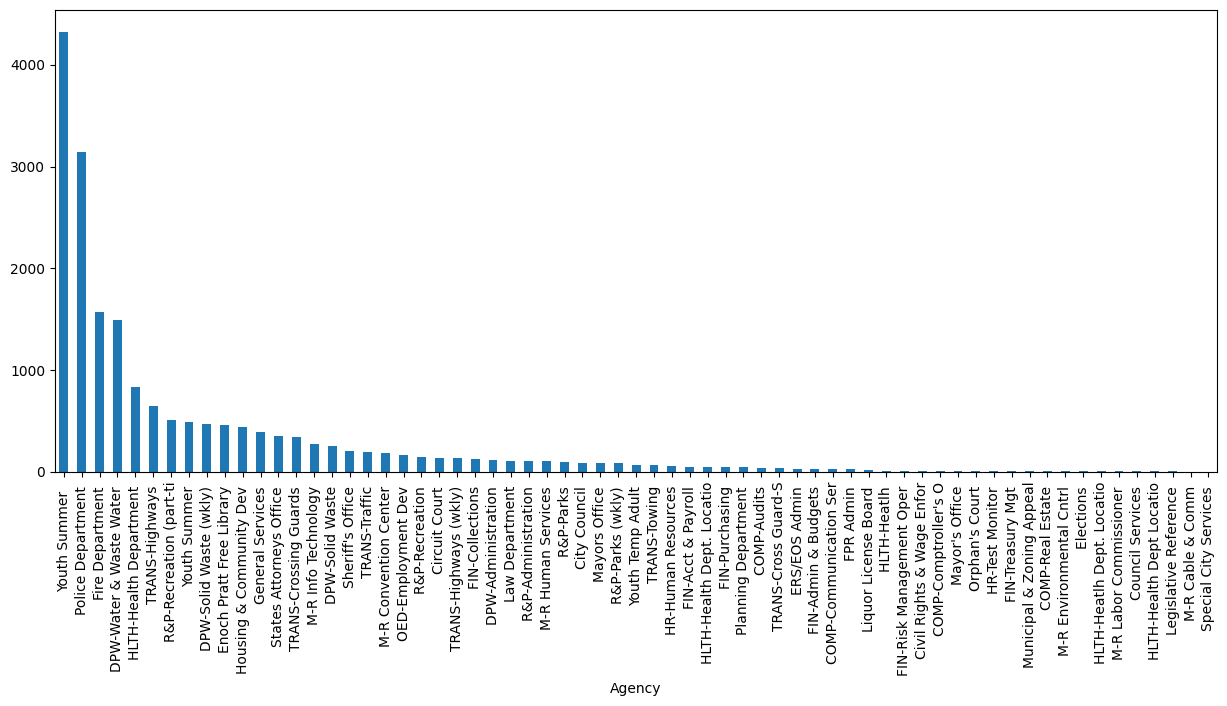

In [15]:
# lets check which agencies are doing aggressive hiring

plt.figure(figsize=(15,6))
d_c["Agency"].value_counts().plot(kind="bar")     # gives same as d_c.group_by(["Agency"])["JobTitle"].count() but in decending order.

In [16]:
# lets analyse with agency id

d_c["AgencyID"].value_counts()

AgencyID
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: count, Length: 1177, dtype: int64

As agency count is not equal to agency id count , This means 1 agency  is having multiple agency ids

In [17]:
# lets analysis most demanding job

d["JobTitle"].value_counts()

JobTitle
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: count, Length: 1075, dtype: int64

<Axes: >

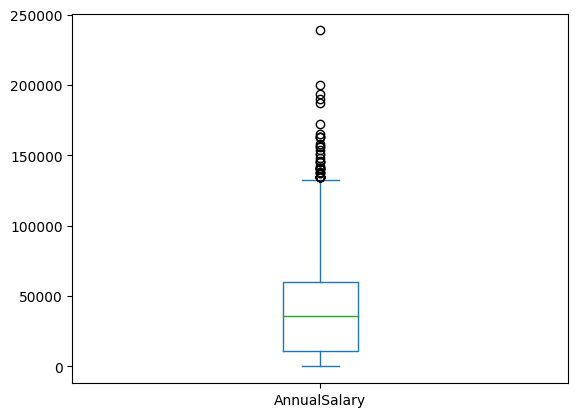

In [24]:
# to analyse AnnualSalary which is a continuous column, we can use box plot as it can also show outliers

d_c["AnnualSalary"].plot.box()     # [OR] d_c["AnnualSalary"].plot(kind="box")

In [36]:
# lets see the data where salary is more than 1.5Lak 

d_c[d_c["AnnualSalary"] > 150000]

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,MONTH,YEAR,DAY
846,"Barbour,Jacqueline M",CONTRACT SERVICES SPEC. I,A99386,Police Department,07/03/2007,156000.0,JULY,2007,3
991,"Batts,Anthony W",EXECUTIVE LEVEL III,A99390,Police Department,09/25/2012,193800.0,SEPTEMBER,2012,25
1229,"Bernstein,Gregg L",STATE'S ATTORNEY,A29001,States Attorneys Office,01/03/2011,238772.0,JANUARY,2011,3
1350,"Black,Harry E",EXECUTIVE LEVEL III,A23001,FIN-Admin & Budgets,01/30/2012,190000.0,JANUARY,2012,30
3177,"Charles,Ronnie E",EXECUTIVE LEVEL III,A83001,HR-Human Resources,07/05/2012,200000.0,JULY,2012,5
3277,"Chow,Rudolph S",DIRECTOR PUBLIC WORKS,A41101,DPW-Administration,02/01/2011,163200.0,FEBUARY,2011,1
5698,"Ford,Niles R",EXECUTIVE LEVEL III,A64006,Fire Department,01/15/2014,165000.0,JANUARY,2014,15
9140,"Johnson,William M",EXECUTIVE LEVEL III,A49101,TRANS-Highways,05/22/2013,158100.0,MAY,2013,22
11177,"McCarty,Robert L",CITY AUDITOR,A24001,COMP-Audits,03/27/1978,153600.0,MARCH,1978,27
12595,"Nilson,George A",CITY SOLICITOR,A30001,Law Department,01/16/2007,163200.0,JANUARY,2007,16


In [35]:
d_c[d_c["AnnualSalary"] > 150000].shape

(16, 9)

<Axes: >

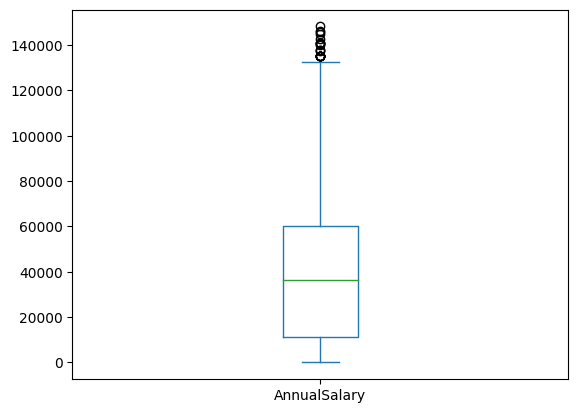

In [37]:
# As there are only 16 rows, we can drop it as they are more outliers

d_c = d_c[d_c["AnnualSalary"] < 150000]
d_c["AnnualSalary"].plot.box()

<Axes: >

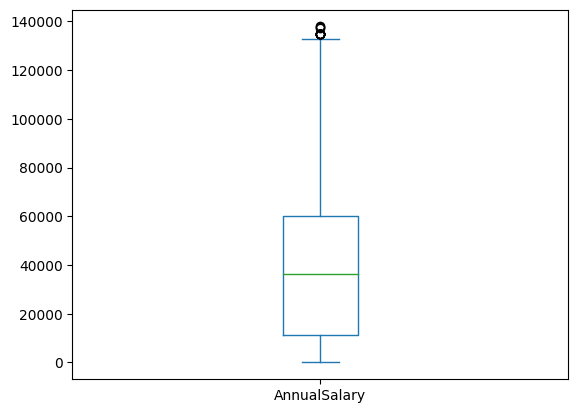

In [38]:
# lets drop more outliers

d_c = d_c[d_c["AnnualSalary"] < 140000]
d_c["AnnualSalary"].plot.box()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23148\3337332477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_c["AnnualSalary"])


<Axes: xlabel='AnnualSalary', ylabel='Density'>

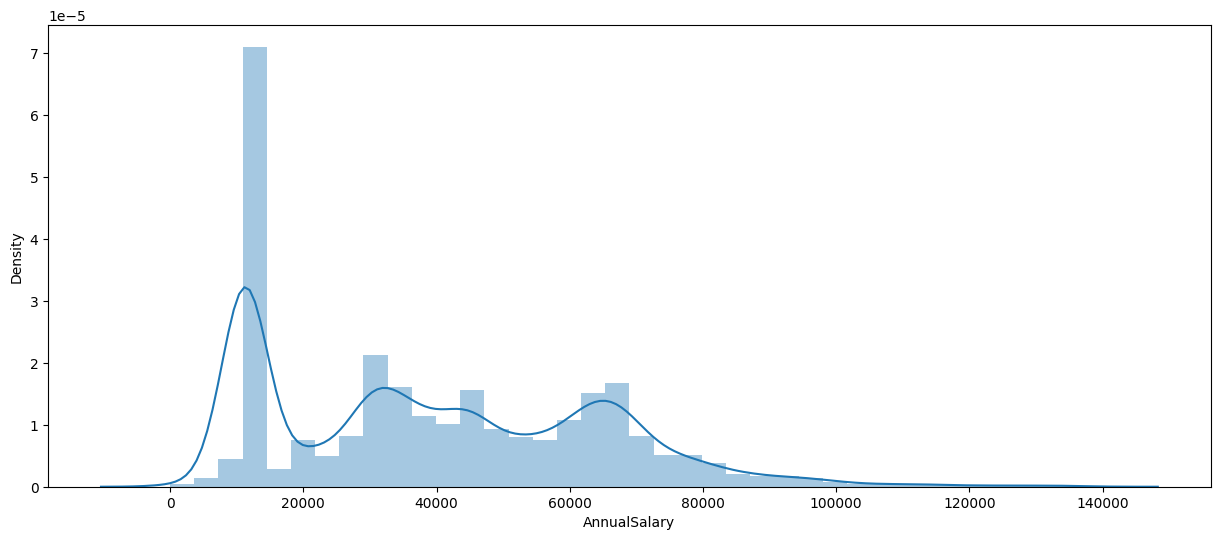

In [47]:
# lets see the distribution plot of annual salary

plt.figure(figsize=(15,6))
sns.distplot(d_c["AnnualSalary"])

Text(0, 0.5, 'No. of people working')

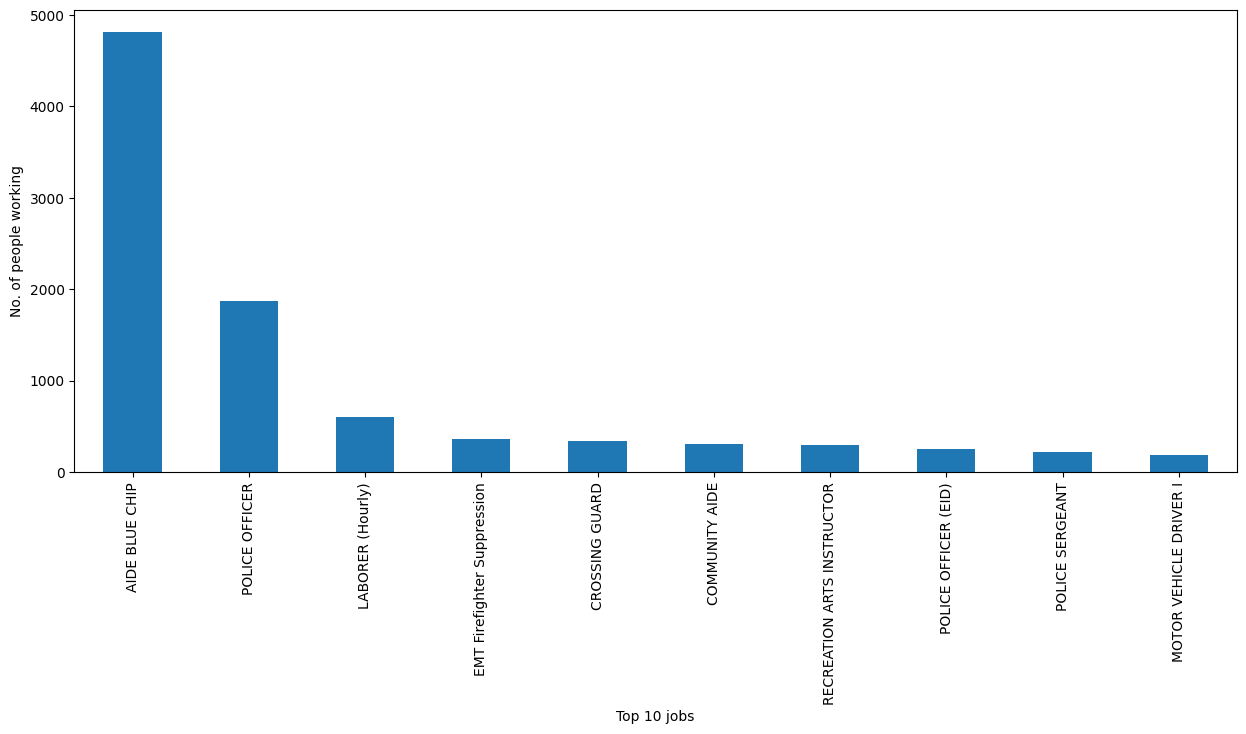

In [52]:
# lets see top 10 jobs for which hiring is there

plt.figure(figsize=(15,6))
d_c["JobTitle"].value_counts().head(10).plot(kind="bar")
plt.xlabel("Top 10 jobs")
plt.ylabel("No. of people working")

Text(0, 0.5, 'Mean Salary')

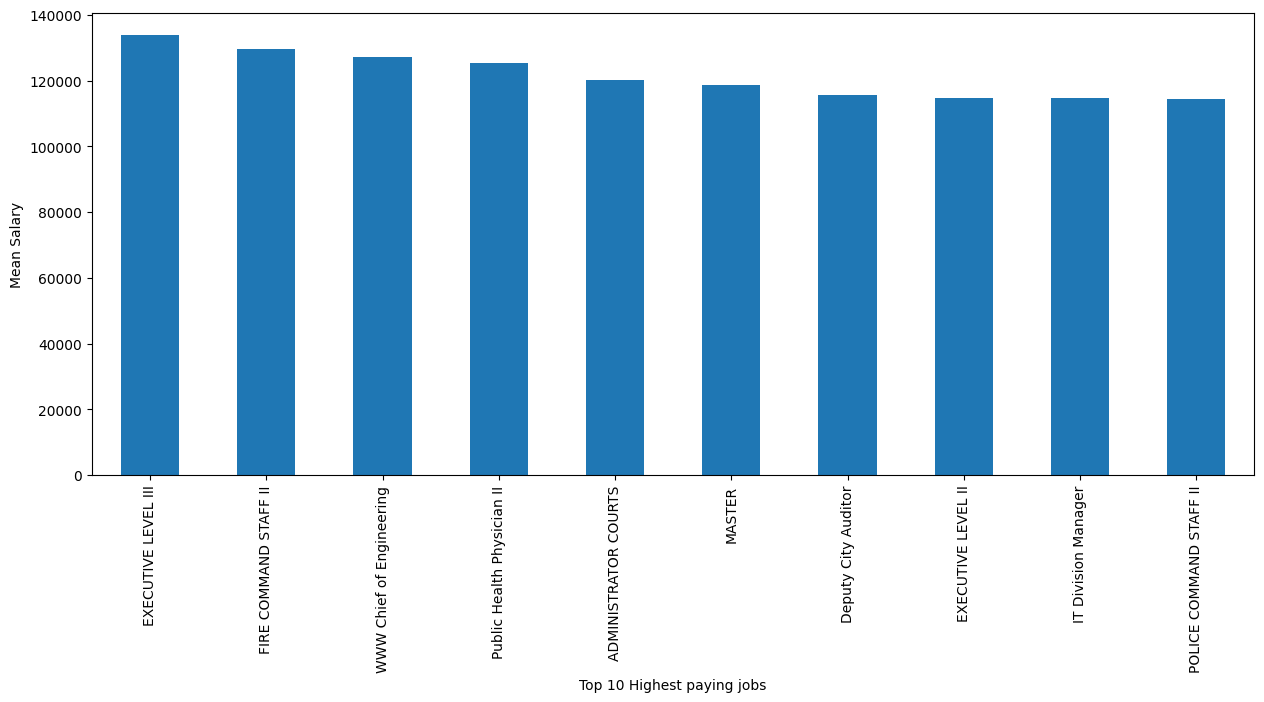

In [62]:
# lets find top 10 jobs that has highest salary

plt.figure(figsize=(15,6))
d_c.groupby(["JobTitle"])["AnnualSalary"].mean().sort_values(ascending=False).head(10).plot(kind="bar") # ".sort_values" -- > sorts columns 
plt.xlabel("Top 10 Highest paying jobs")
plt.ylabel("Mean Salary")

Text(0, 0.5, 'no. of employees')

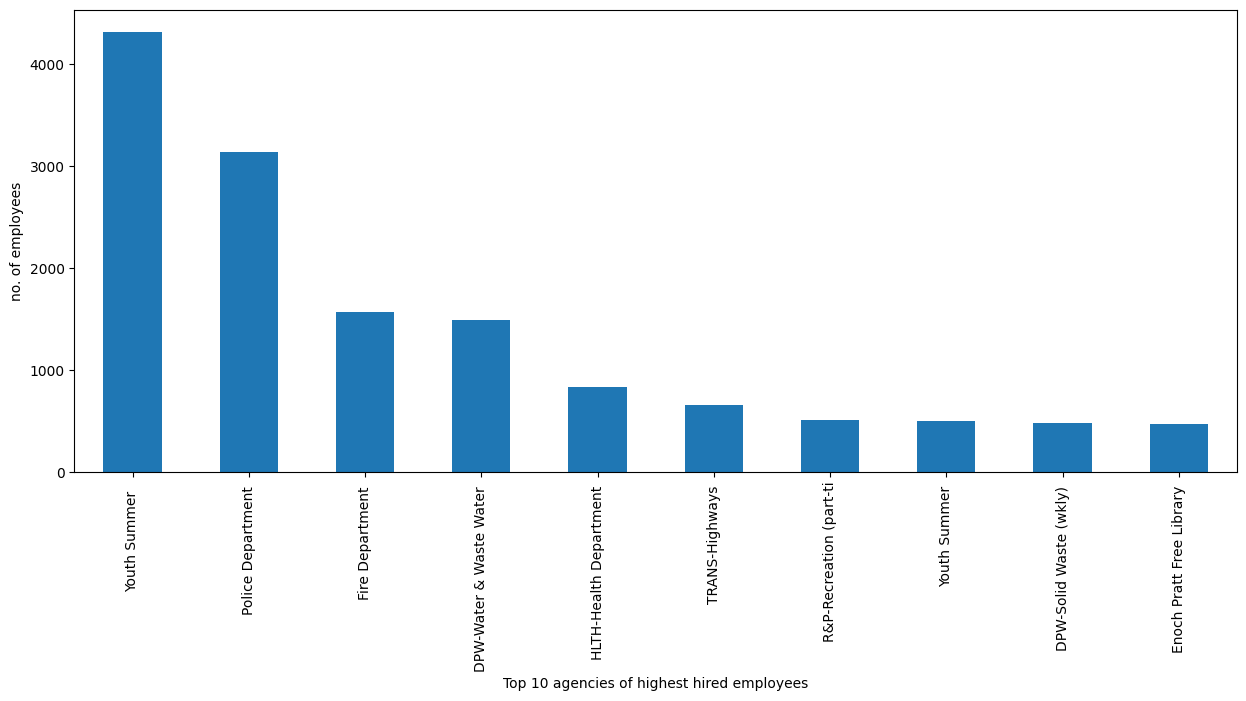

In [71]:
# lets find top 10 agencies having highest no. of employees

plt.figure(figsize=(15,6))
d_c["Agency"].value_counts().head(10).plot(kind="bar")   
# same as d_c.groupby(["Agency"])["JobTitle"].count().sort_values(ascending=False).head(10).plot(kind="bar")

plt.xlabel("Top 10 agencies of highest hired employees")
plt.ylabel("no. of employees")


Text(0, 0.5, 'no. of employees')

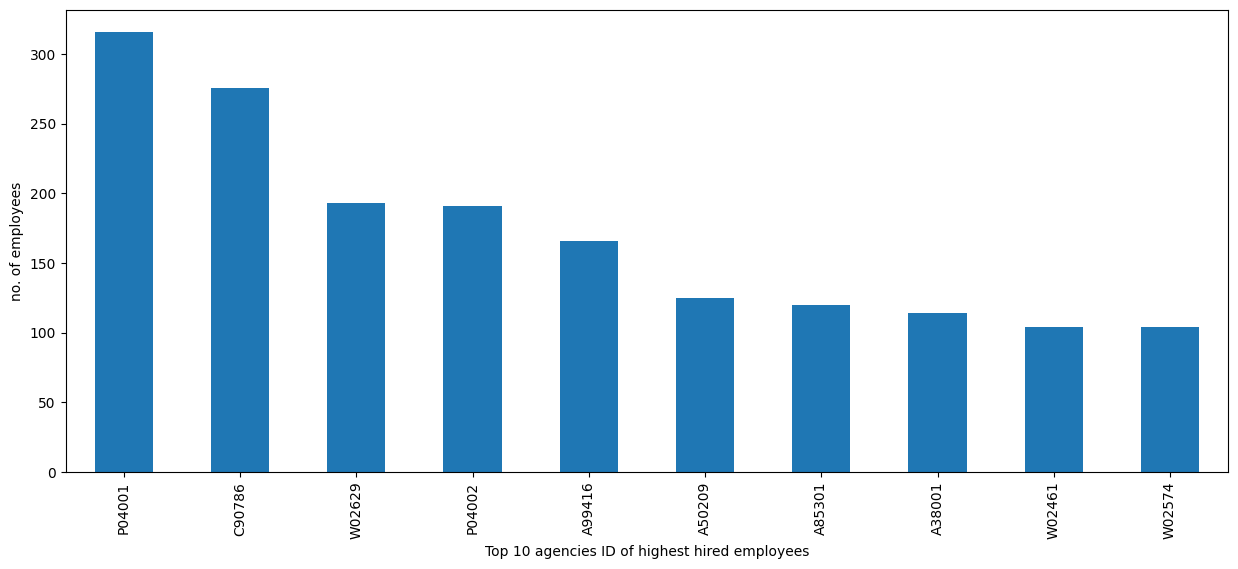

In [72]:
# lets find top 10 AgencyID 

plt.figure(figsize=(15,6))
d_c["AgencyID"].value_counts().head(10).plot(kind="bar")   
plt.xlabel("Top 10 agencies ID of highest hired employees")
plt.ylabel("no. of employees")

<Axes: xlabel='YEAR', ylabel='AnnualSalary'>

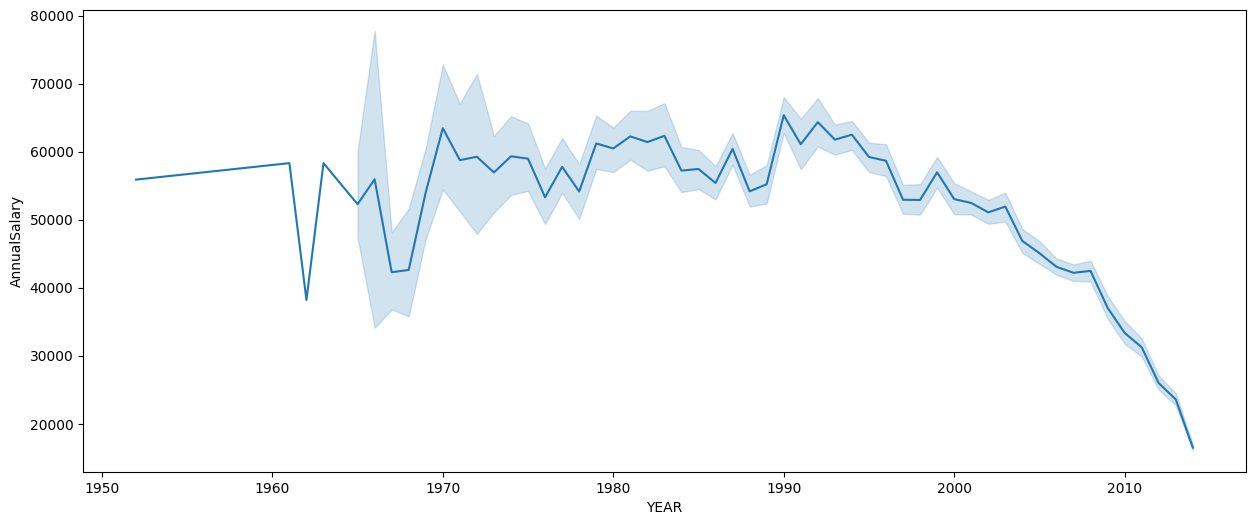

In [92]:
# lets analyse salary distribution year wise

plt.figure(figsize=(15,6))
sns.lineplot(x=d_c["YEAR"],y=d_c["AnnualSalary"])


<Axes: xlabel='MONTH'>

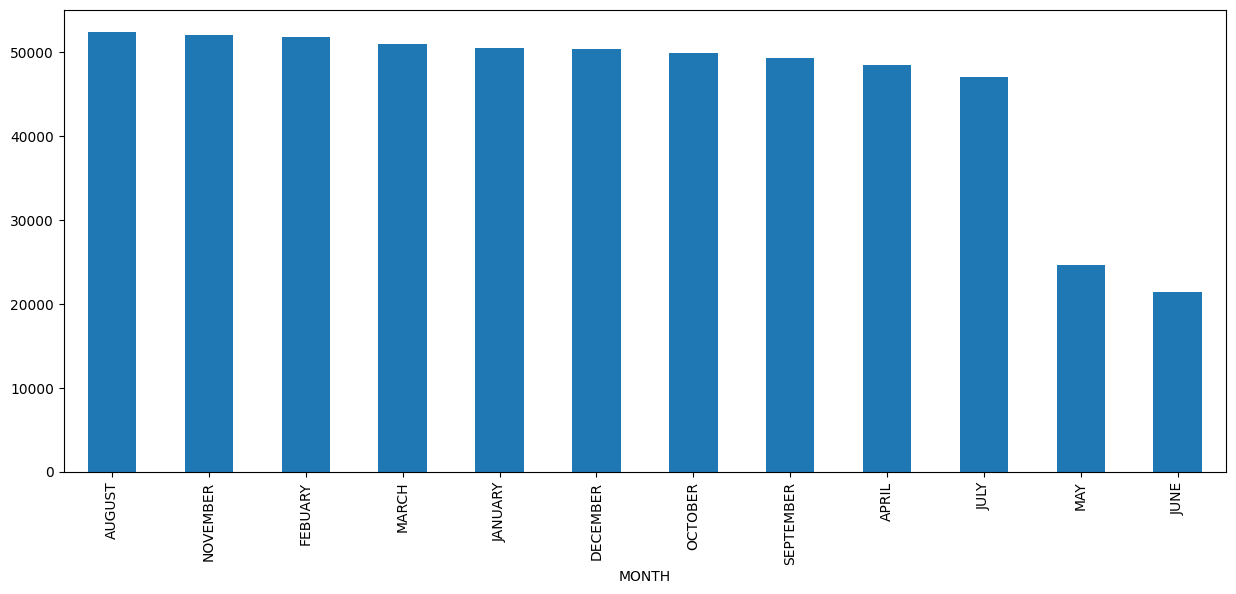

In [96]:
# lets see the annual salary wrt months

plt.figure(figsize=(15,6))
d_c.groupby(["MONTH"])["AnnualSalary"].mean().sort_values(ascending=False).plot(kind="bar")

As we can see the salary is decreased on may, june months. It may be due to hiring season. To verify that lets see the most hired months

<Axes: xlabel='MONTH'>

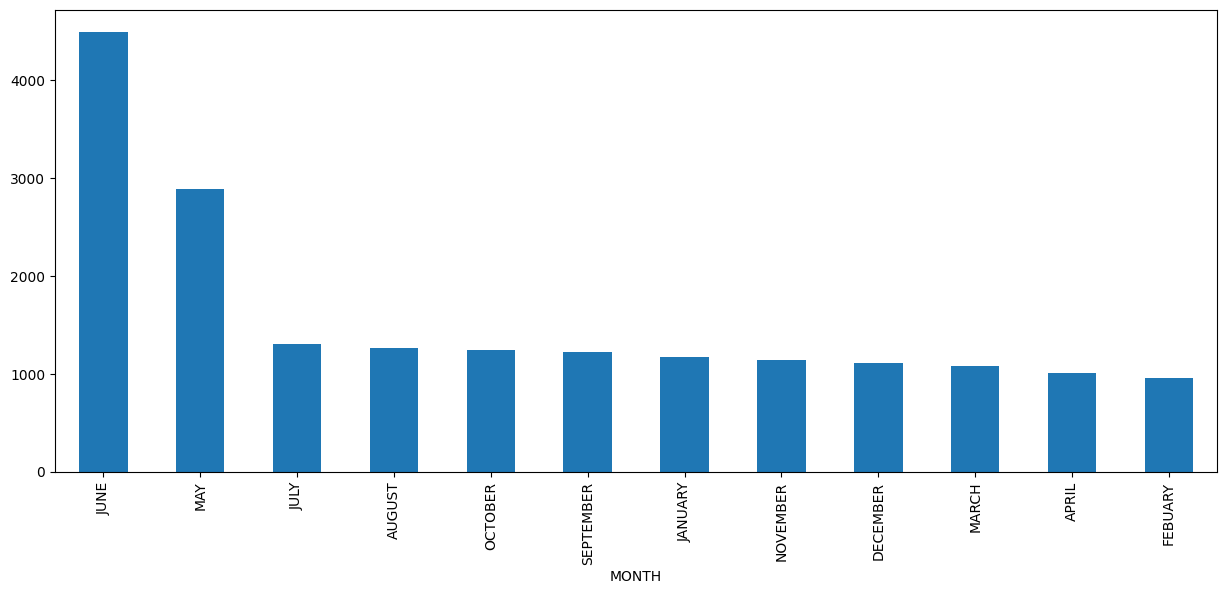

In [99]:
# lets see which month most no. of employees are hired

plt.figure(figsize=(15,6))
d_c["MONTH"].value_counts().plot(kind="bar")

So, as we gussed this is the reason for spike in hiring and decrease in salary for employees.

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


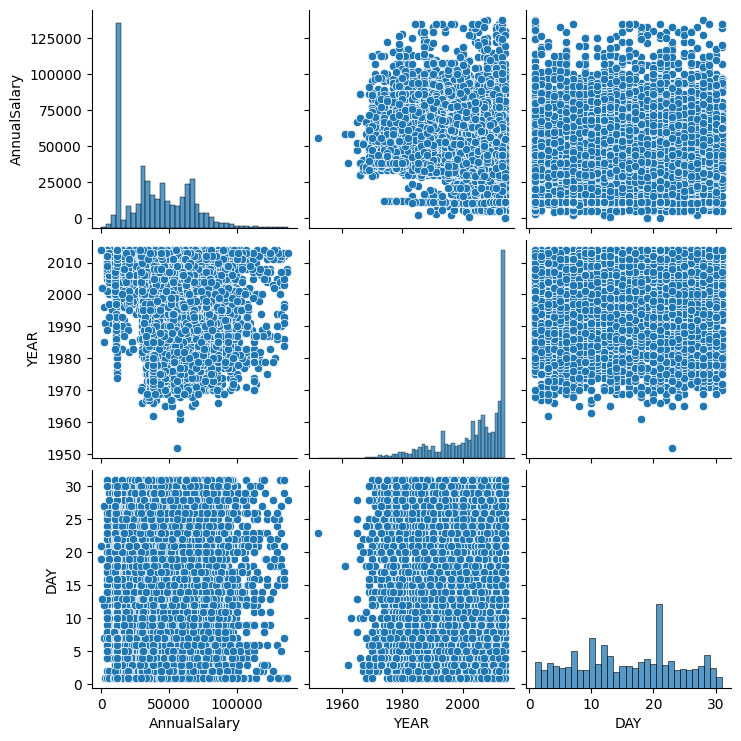

In [104]:
# lets do multivariate analysis

sns.pairplot(d_c)

<Axes: >

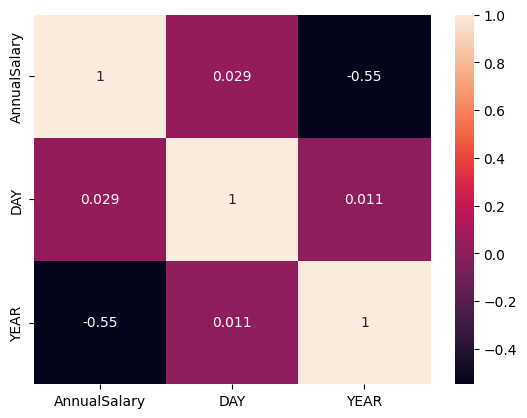

In [109]:
sns.heatmap(d_c[["AnnualSalary","DAY","YEAR"]].corr(),annot=True)

**CATOGORICAL ENCCODING - MEAN ENCODING**

In [111]:
d_c.shape
d_c

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,MONTH,YEAR,DAY
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,JUNE,2013,10
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,OCTOBER,1979,24
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,SEPTEMBER,2006,25
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,JULY,2009,23
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,JULY,2013,24
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,MAY,2014,21
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,MAY,2014,21
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,DECEMBER,2013,17
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,JANUARY,2013,23


We need to encode the string columns with some numerical values

In [112]:
# lets convert jobtitles to numeric

mean_jobs = d_c.groupby(["JobTitle"])["AnnualSalary"].mean()      # took mean() as mean encoding
mean_jobs

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1067, dtype: float64

In [114]:
d_c["JobTitle"] = d_c["JobTitle"].map(mean_jobs)
d_c

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,MONTH,YEAR,DAY
0,"Aaron,Keontae E",11313.967200,W02200,Youth Summer,06/10/2013,11310.0,JUNE,2013,10
1,"Aaron,Patricia G",47443.500000,A03031,OED-Employment Dev,10/24/1979,53428.0,OCTOBER,1979,24
2,"Aaron,Petra L",69750.666667,A29005,States Attorneys Office,09/25/2006,68300.0,SEPTEMBER,2006,25
3,"Abaineh,Yohannes T",57940.000000,A65026,HLTH-Health Department,07/23/2009,62000.0,JULY,2009,23
4,"Abbene,Anthony M",44531.160494,A99416,Police Department,07/24/2013,43999.0,JULY,2013,24
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,W02235,Youth Summer,05/21/2014,11310.0,MAY,2014,21
18977,"Zotamou,Pivot D",11313.967200,W02629,Youth Summer,05/21/2014,11310.0,MAY,2014,21
18978,"Zovistoski,Zachary D",44531.160494,A99416,Police Department,12/17/2013,43999.0,DECEMBER,2013,17
18979,"Zubyk,Stanislav T",60588.139335,A99262,Police Department,01/23/2013,44104.0,JANUARY,2013,23


As name column is not important for the study of salary, we can drop the dame column

In [129]:
d_c.drop([" Name"],axis=1,inplace=True)
d_c

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,MONTH,YEAR,DAY
0,11313.967200,W02200,Youth Summer,06/10/2013,11310.0,JUNE,2013,10
1,47443.500000,A03031,OED-Employment Dev,10/24/1979,53428.0,OCTOBER,1979,24
2,69750.666667,A29005,States Attorneys Office,09/25/2006,68300.0,SEPTEMBER,2006,25
3,57940.000000,A65026,HLTH-Health Department,07/23/2009,62000.0,JULY,2009,23
4,44531.160494,A99416,Police Department,07/24/2013,43999.0,JULY,2013,24
...,...,...,...,...,...,...,...,...
18976,11313.967200,W02235,Youth Summer,05/21/2014,11310.0,MAY,2014,21
18977,11313.967200,W02629,Youth Summer,05/21/2014,11310.0,MAY,2014,21
18978,44531.160494,A99416,Police Department,12/17/2013,43999.0,DECEMBER,2013,17
18979,60588.139335,A99262,Police Department,01/23/2013,44104.0,JANUARY,2013,23


In [130]:
# lets convert agency to numbric

mean_agency = d_c.groupby(["Agency"])["AnnualSalary"].mean()
mean_agency

Agency
COMP-Audits               65004.615385
COMP-Communication Ser    37876.966667
COMP-Comptroller's O      67637.625000
COMP-Real Estate          64279.875000
Circuit Court             56210.485214
                              ...     
TRANS-Towing              33920.215385
TRANS-Traffic             34172.489691
Youth Summer              11346.315789
Youth Summer              11310.270645
Youth Temp Adult          24202.971014
Name: AnnualSalary, Length: 65, dtype: float64

In [131]:
d_c["Agency"] = d_c["Agency"].map(mean_agency)
d_c

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,MONTH,YEAR,DAY
0,11313.967200,W02200,11310.270645,06/10/2013,11310.0,JUNE,2013,10
1,47443.500000,A03031,51495.424242,10/24/1979,53428.0,OCTOBER,1979,24
2,69750.666667,A29005,64874.560224,09/25/2006,68300.0,SEPTEMBER,2006,25
3,57940.000000,A65026,39980.900360,07/23/2009,62000.0,JULY,2009,23
4,44531.160494,A99416,61481.005417,07/24/2013,43999.0,JULY,2013,24
...,...,...,...,...,...,...,...,...
18976,11313.967200,W02235,11310.270645,05/21/2014,11310.0,MAY,2014,21
18977,11313.967200,W02629,11346.315789,05/21/2014,11310.0,MAY,2014,21
18978,44531.160494,A99416,61481.005417,12/17/2013,43999.0,DECEMBER,2013,17
18979,60588.139335,A99262,61481.005417,01/23/2013,44104.0,JANUARY,2013,23


In [132]:
# lets convert Month to numeric

rev_dic = {"JANUARY":1,"FEBUARY":2,"MARCH":3,"APRIL":4,"MAY":5,"JUNE":6,"JULY":7,"AUGUST":8,"SEPTEMBER":9,"OCTOBER":10,"NOVEMBER":11,"DECEMBER":12}

d_c["MONTH"] = d_c["MONTH"].map(rev_dic)
d_c

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,MONTH,YEAR,DAY
0,11313.967200,W02200,11310.270645,06/10/2013,11310.0,6,2013,10
1,47443.500000,A03031,51495.424242,10/24/1979,53428.0,10,1979,24
2,69750.666667,A29005,64874.560224,09/25/2006,68300.0,9,2006,25
3,57940.000000,A65026,39980.900360,07/23/2009,62000.0,7,2009,23
4,44531.160494,A99416,61481.005417,07/24/2013,43999.0,7,2013,24
...,...,...,...,...,...,...,...,...
18976,11313.967200,W02235,11310.270645,05/21/2014,11310.0,5,2014,21
18977,11313.967200,W02629,11346.315789,05/21/2014,11310.0,5,2014,21
18978,44531.160494,A99416,61481.005417,12/17/2013,43999.0,12,2013,17
18979,60588.139335,A99262,61481.005417,01/23/2013,44104.0,1,2013,23


In [133]:
# lets do same thing for agency id

mean_agencyid = d_c.groupby(["AgencyID"])["AnnualSalary"].mean()
mean_agencyid

AgencyID
A01001    58253.577662
A01020    80547.000000
A01030    77855.222222
A02001    66376.466667
A02002    42858.372549
              ...     
W02698    11310.000000
W02699    11310.000000
W07900    24515.227273
W07901    21840.000000
W07905    15080.000000
Name: AnnualSalary, Length: 1176, dtype: float64

In [134]:
d_c["AgencyID"] = d_c["AgencyID"].map(mean_agencyid)
d_c

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,MONTH,YEAR,DAY
0,11313.967200,11310.000000,11310.270645,06/10/2013,11310.0,6,2013,10
1,47443.500000,46667.000000,51495.424242,10/24/1979,53428.0,10,1979,24
2,69750.666667,65926.133333,64874.560224,09/25/2006,68300.0,9,2006,25
3,57940.000000,48071.851064,39980.900360,07/23/2009,62000.0,7,2009,23
4,44531.160494,44012.307229,61481.005417,07/24/2013,43999.0,7,2013,24
...,...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11310.270645,05/21/2014,11310.0,5,2014,21
18977,11313.967200,11310.000000,11346.315789,05/21/2014,11310.0,5,2014,21
18978,44531.160494,44012.307229,61481.005417,12/17/2013,43999.0,12,2013,17
18979,60588.139335,60203.340426,61481.005417,01/23/2013,44104.0,1,2013,23


In [135]:
# As Hire date is not needed , lets remove it

d_c.drop(["HireDate"],axis=1,inplace=True)
d_c

,JobTitle,AgencyID,Agency,AnnualSalary,MONTH,YEAR,DAY
0,11313.967200,11310.000000,11310.270645,11310.0,6,2013,10
1,47443.500000,46667.000000,51495.424242,53428.0,10,1979,24
2,69750.666667,65926.133333,64874.560224,68300.0,9,2006,25
3,57940.000000,48071.851064,39980.900360,62000.0,7,2009,23
4,44531.160494,44012.307229,61481.005417,43999.0,7,2013,24
...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11310.270645,11310.0,5,2014,21
18977,11313.967200,11310.000000,11346.315789,11310.0,5,2014,21
18978,44531.160494,44012.307229,61481.005417,43999.0,12,2013,17
18979,60588.139335,60203.340426,61481.005417,44104.0,1,2013,23


We have all the data in numeric with the help of mean encoding(catogorical encoding). Now we need to split the data for training and testing.

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [137]:

train,test = train_test_split(d_c,test_size=0.2,random_state=40)      # 20% --> test variable , 80% --> train variable

# "random_state" --> takes that percentage from random position (disorder)

In [138]:
# now we need to divide x(independent variable)(Question) & y(dependent variable)(Answer) for both test and train

y_train = train.pop("AnnualSalary")
x_train = train

In [139]:
y_test = test.pop("AnnualSalary")
x_test = test

In [140]:
x_train

,JobTitle,AgencyID,Agency,MONTH,YEAR,DAY
7642,43420.383333,58304.555556,70879.869663,10,1973,29
4899,37750.307692,57531.300000,42565.513078,2,2008,11
6525,11313.967200,11310.000000,11310.270645,6,2013,19
10668,21570.423841,53425.912281,44092.921659,6,2014,4
8828,28019.000000,57318.900000,61481.005417,1,2014,23
...,...,...,...,...,...,...
11615,61887.457627,54165.304348,44092.921659,2,2012,13
16156,41202.000000,44320.250000,39950.622030,6,2014,9
14589,11313.967200,11310.000000,11310.270645,6,2012,12
14643,60588.139335,57363.487805,61481.005417,9,2011,26


Now, if u see in the columns, there arehuge values(Agency,AgencyID,..) and small values(Month, year..). This cause the model to be biased.To solve this we need to do standardisation to x_test & x_train

In [141]:
y_train

7642     67288.0
4899     36887.0
6525     11310.0
10668    29494.0
8828     27808.0
          ...   
11615    49668.0
16156    41202.0
14589    11310.0
14643    44773.0
11673    82704.0
Name: AnnualSalary, Length: 15108, dtype: float64

In [143]:
# Lets standardize the values.
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])    # scales all the columns in the x_train
x_train

,JobTitle,AgencyID,Agency,MONTH,YEAR,DAY
7642,0.165190,0.850517,1.502119,1.234739,-2.995648,1.571928
4899,-0.068712,0.815681,0.151586,-1.483279,0.375314,-0.571617
6525,-1.159263,-1.266644,-1.339221,-0.124270,0.856880,0.381070
10668,-0.736164,0.630729,0.224440,-0.124270,0.953194,-1.405217
8828,-0.470147,0.806112,1.053814,-1.823031,0.953194,0.857413
...,...,...,...,...,...,...
11615,0.926993,0.664039,0.224440,-1.483279,0.760567,-0.333445
16156,0.073677,0.220508,0.026861,-0.124270,0.953194,-0.809788
14589,-1.159263,-1.266644,-1.339221,-0.124270,0.760567,-0.452531
14643,0.873394,0.808121,1.053814,0.894987,0.664254,1.214670


In [152]:
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns]) 
x_test

,JobTitle,AgencyID,Agency,MONTH,YEAR,DAY
8116,-0.337661,-0.225668,0.127076,-1.140200,0.960034,-0.676243
12921,-1.174119,-1.286494,-1.371502,-0.129988,0.768185,-0.436279
4004,0.856752,1.133209,1.034006,0.543487,0.288561,-0.676243
10824,0.125074,0.176954,0.432324,0.543487,-0.286987,1.363444
9512,1.379931,1.443921,0.432324,-0.129988,0.768185,-1.396132
...,...,...,...,...,...,...
16417,3.091357,-0.381985,-0.412378,-0.129988,-3.164726,-1.036187
8485,0.630554,0.150354,0.127076,-0.129988,-1.629932,1.603408
3085,1.751339,1.387403,1.484649,-0.466725,-1.246233,0.523573
11816,-0.101478,0.272671,-0.218125,1.216962,-0.670685,-0.796224


**LINEAR REGRESSION MODEL**

In [153]:
# now lets create a linear regression model

lr = LinearRegression()

In [154]:
reg = lr.fit(x_train,y_train)            # train model with these x_train , y_train

In [155]:
y_pred = reg.predict(x_test)             # predict the y_test 

In [156]:
y_test

8116     30014.0
12921    11310.0
4004     60004.0
10824    44190.0
9512     71600.0
          ...   
16417    96500.0
8485     55100.0
3085     82592.0
11816    37339.0
18493    78897.0
Name: AnnualSalary, Length: 3777, dtype: float64

In [157]:
y_pred

array([29234.16338847, 10605.9975065 , 59117.5420147 , ...,
       82249.90330949, 39601.20928108, 76473.11188939])

**Actual (y_test) is 30014, but our model predicted it is 29234.16.. (y_pred). Lets see the evaluation matrics for our linear regression model.As there are many methods like L2 loss, L1 loss etc.. But we will use the popular one, i.e, R2 score.**

In [158]:
# lets find R2 score

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9639076918145557

**THEREFORE OUR LINEAR REGRESSION MODEL IS 96.4% ACCURATE.**